<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Import all necessary libraries.
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

/usr/local/lib64/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/tools/../../data/./models/NpPointsCraft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/tools/../../data/./models/NpPointsCraft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [5]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

In [6]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

[[[875.0542491316626, 568.785930466232], [875.0542491316625, 511.083522446599], [1081.9457529956658, 465.5673955767052], [1081.9457508683377, 523.2697993643424]]]


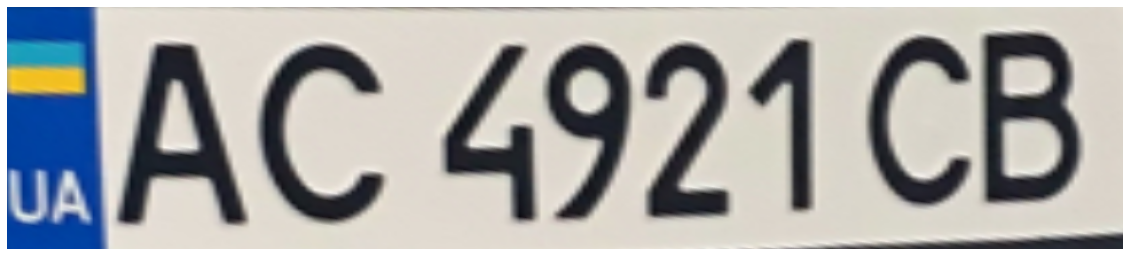

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['eu_ua_2015']
[1]
['AC4921CB']


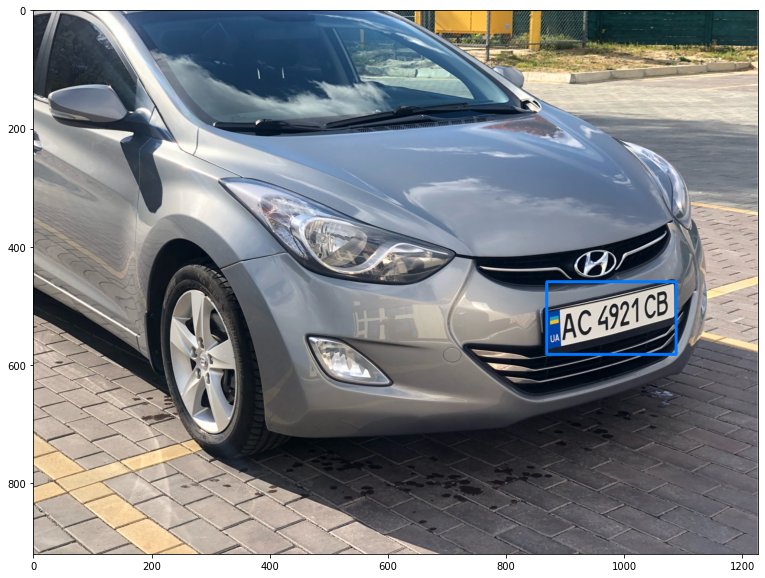

[[[1698.6307371132839, 1050.8335122372641], [1698.630737113284, 997.5001789316684], [1790.0433004162583, 922.2192415056224], [1790.043300841066, 975.552572840691]]]


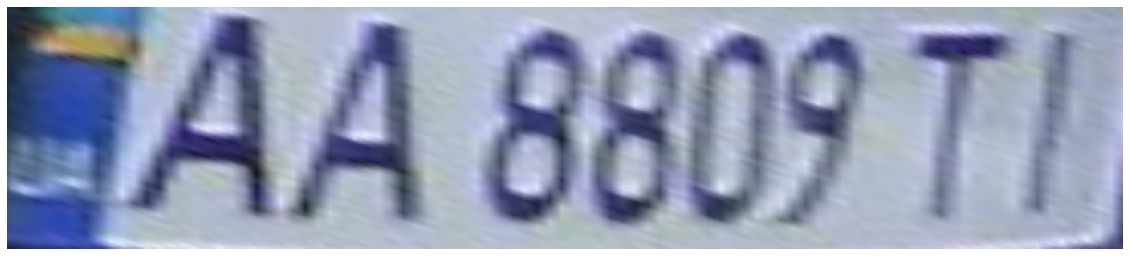

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['eu_ua_2015']
[1]
['AA8809TI']


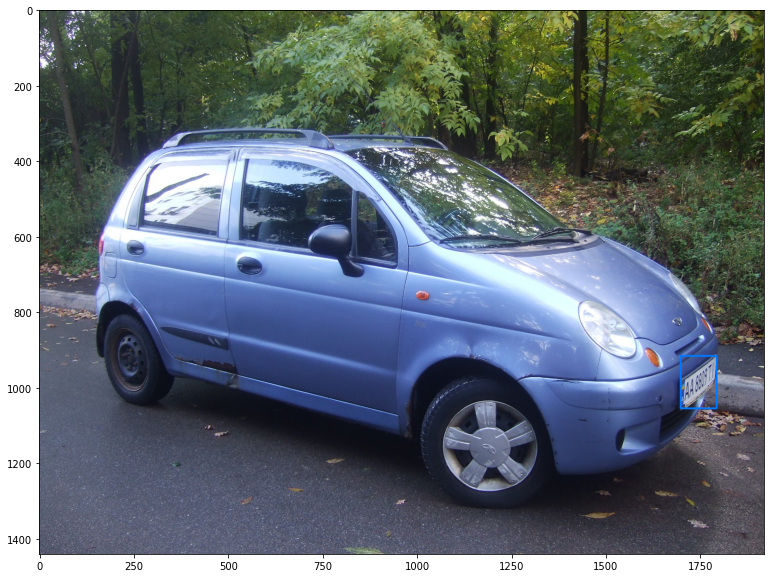

[[[847.56, 405.4], [847.56, 380.6], [946.0, 380.6], [946.0, 405.4]], [[431.8399979782104, 404.0666667556763], [431.8399991607666, 379.2666622638702], [526.0, 379.26665818214417], [526.0, 404.0666626739502]]]


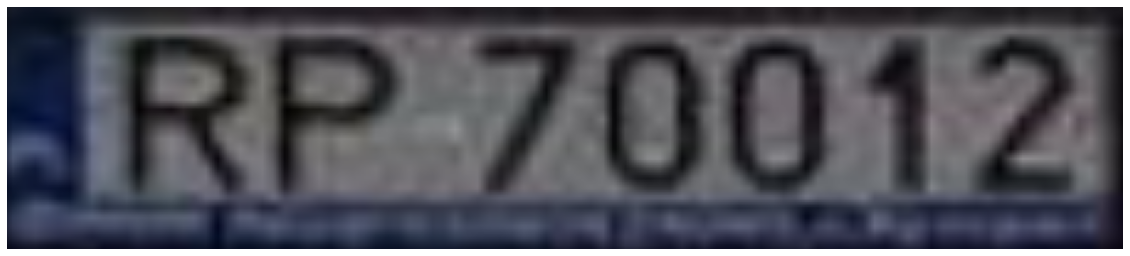

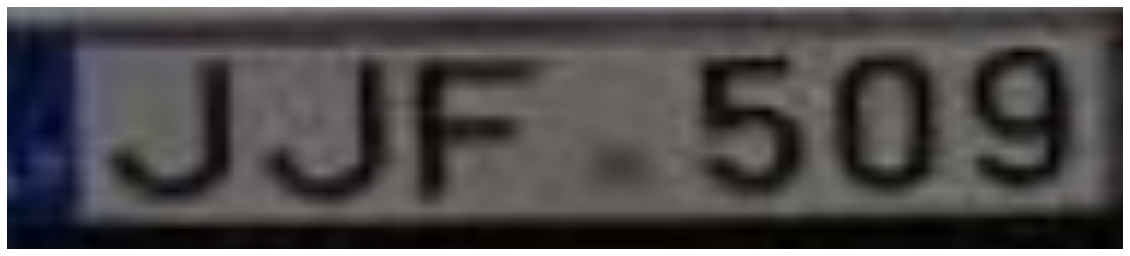

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['eu', 'eu']
[1, 1]
['RP70012', 'JJF509']


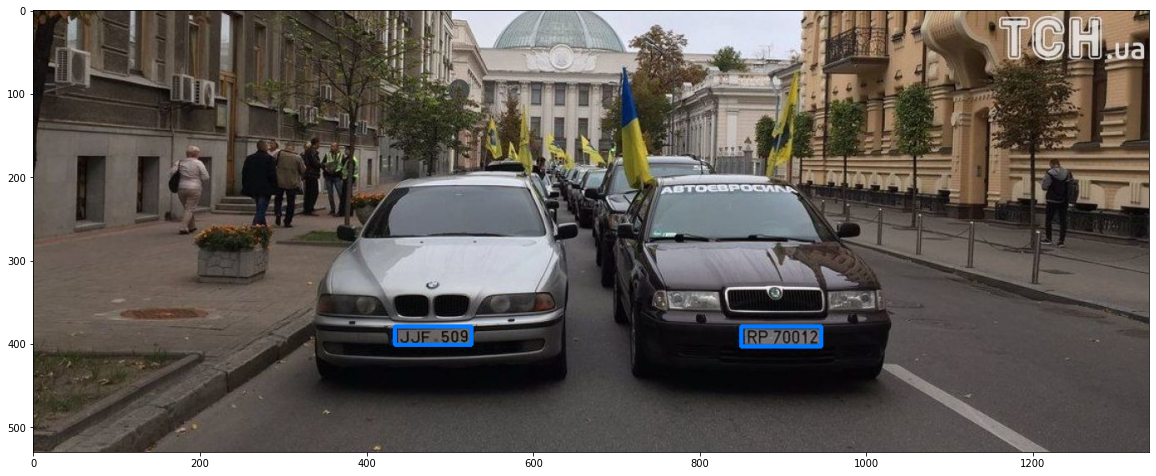

[[[348.9459946581221, 712.6227421470335], [348.94599465812206, 654.5404124950041], [589.0540053418779, 662.3700201153111], [589.0539994247572, 720.4523475353222]], [[162, 405], [162, 385], [211, 385], [211, 405]]]


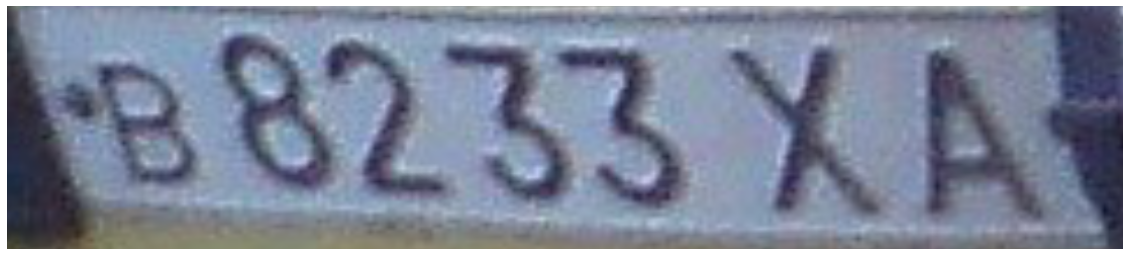

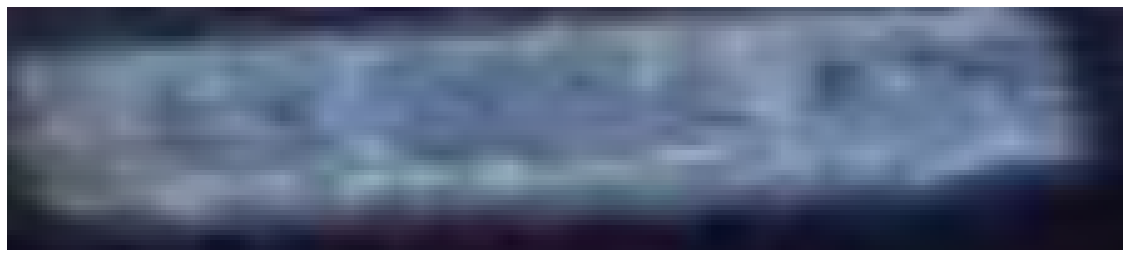

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['su', 'am']
[1, 2]
['В8233ХА', '']


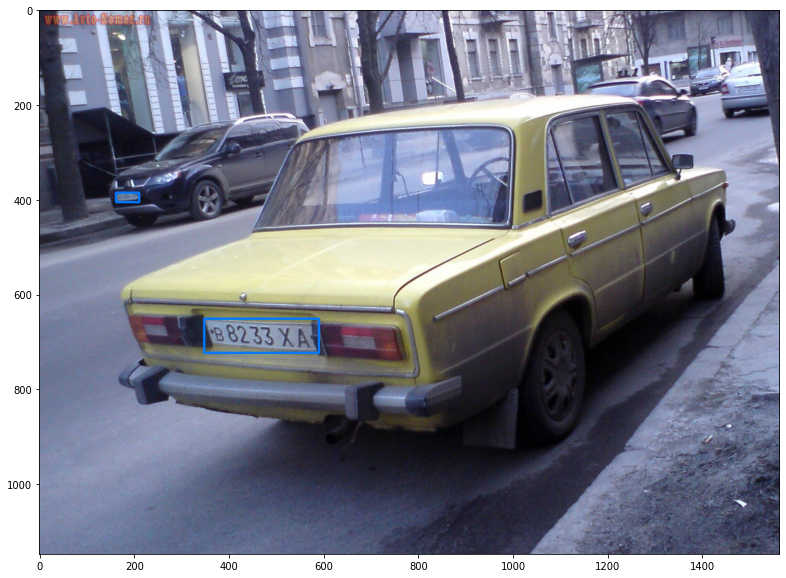

[[[1728.9540466555854, 1802.9415767938488], [1712.9411862535849, 1637.3075211173282], [2580.987167952321, 1553.3882016703133], [2597.0, 1719.0222576263816]]]


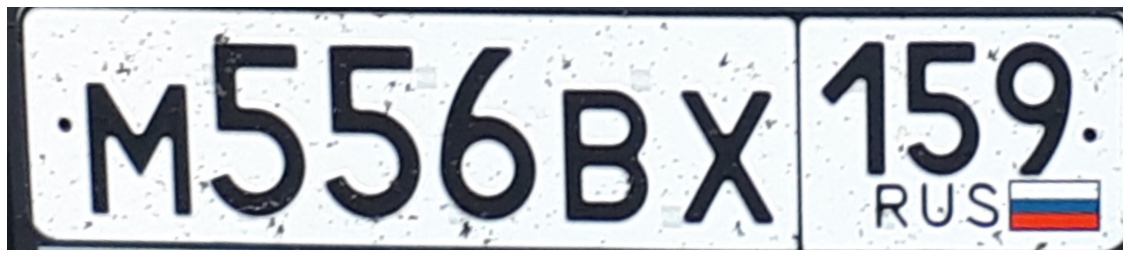

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['ru']
[1]
['M556BX159']


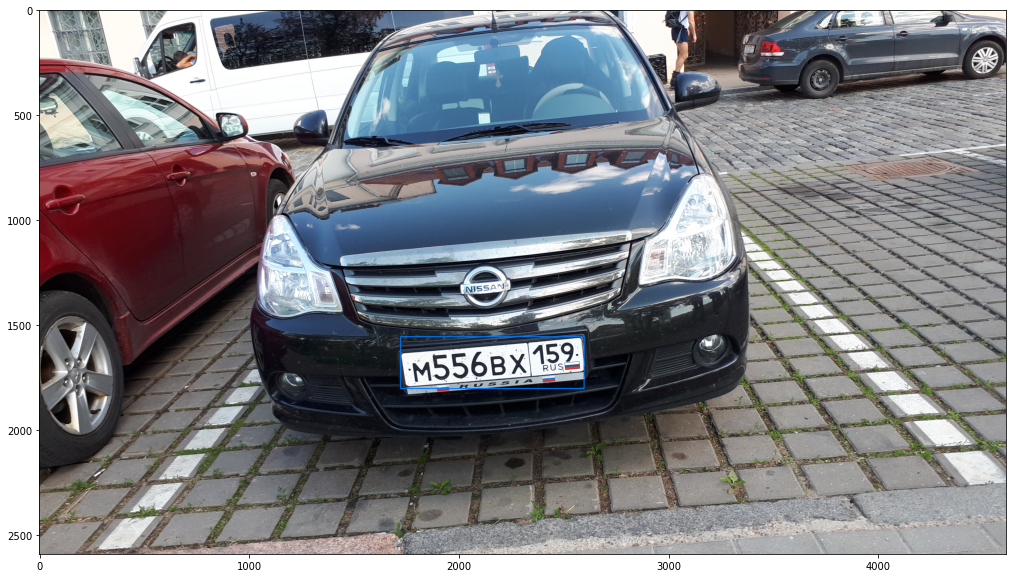

[[[166.79749290111792, 446.70659010885487], [166.79749290111792, 386.88274727067613], [303.7668099609117, 457.44268902111395], [303.766805199395, 517.266531771936]]]


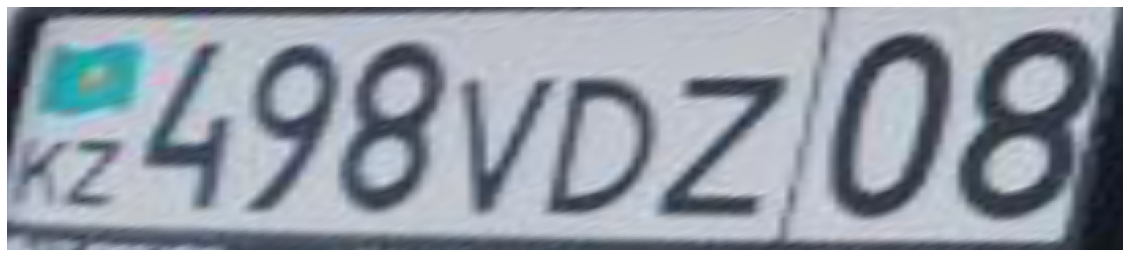

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['kz']
[1]
['498VDZ08']


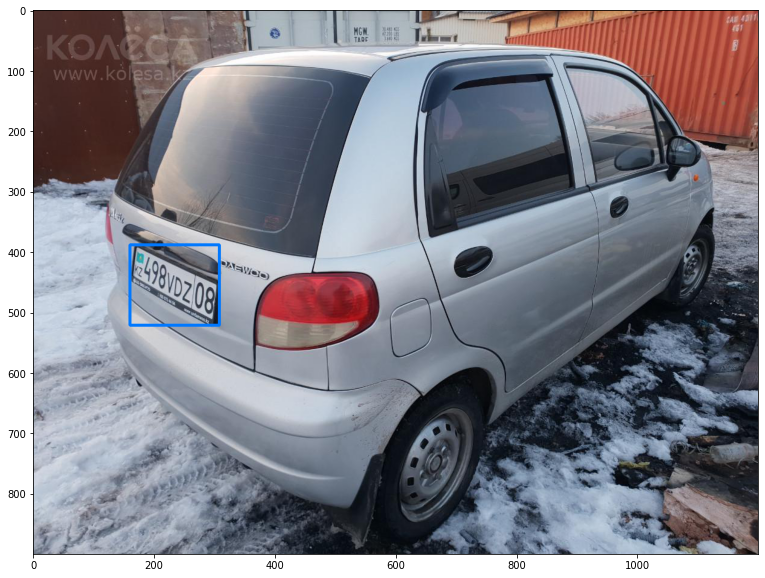

[[[642.0, 496.19999992370606], [642.0, 463.133333568573], [799.0, 463.133333568573], [799.0, 496.19999992370606]], [[972, 271], [972, 248], [1000, 248], [1000, 271]]]


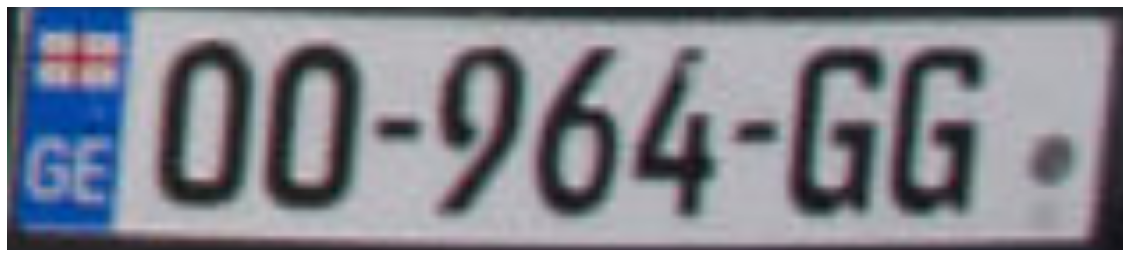

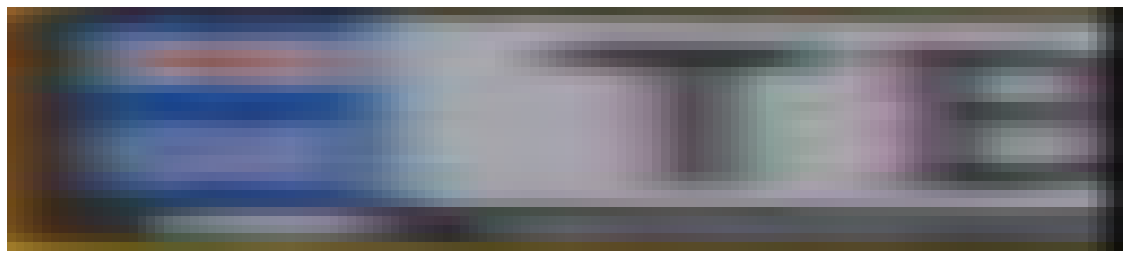

/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['ge', 'eu_ua_2015']
[1, 1]
['00964GG', 'C77IE']


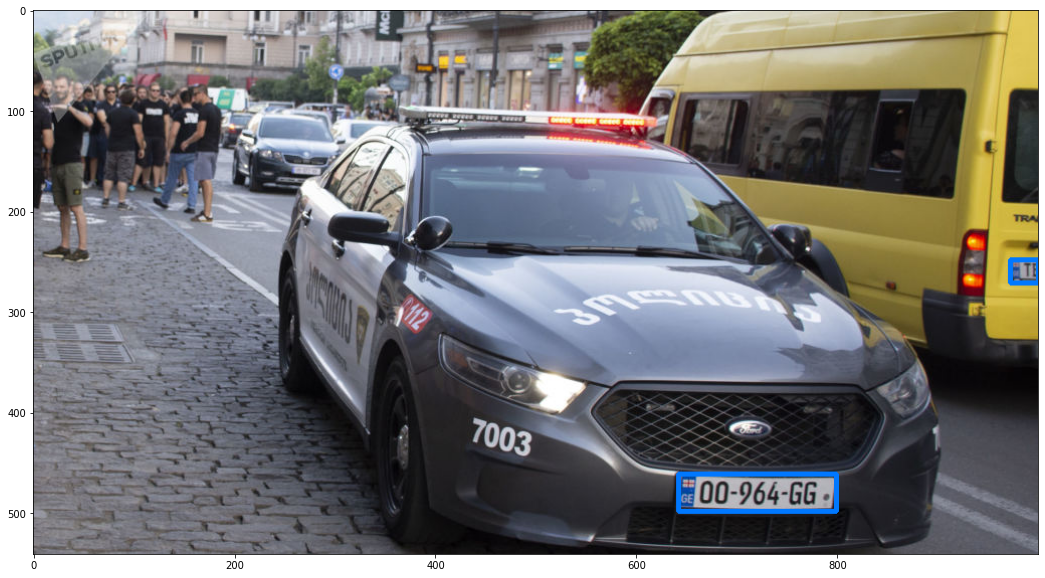

In [7]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    targetBoxes = detector.detect_bbox(copy.deepcopy(img))
    targetBoxes = targetBoxes

    all_points = npPointsCraft.detect(img, targetBoxes)
    all_points = [ps for ps in all_points if len(ps)]
    print(all_points)

     # cut zones
    toShowZones = [getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points]
    zones = convertCvZonesRGBtoBGR(toShowZones)
    for zone, points in zip(toShowZones, all_points):
        plt.axis("off")
        plt.imshow(zone)
        plt.show()

    # find standart
    regionIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)
    print(regionNames)
    print(countLines)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones, regionNames, countLines)
    print(textArr)
    
    # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
    plt.imshow(img)
    plt.show()